In [1]:
infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206', '147.32.84.207','147.32.84.208','147.32.84.209']

normal_hosts = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36, 147.32.80.9', '147.32.87.11']



In [19]:
test_hosts = infected_hosts+ normal_hosts

In [20]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.preprocessing import StandardScaler as StandardScaler
from helper_functions.classification import *
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('./capture20110818.pcap.netflow.labeled.remastered')
data[['Src_IP_Addr', 'Src_Port']] = data['Src_IP_Addr:Port'].str.split(':', n=1, expand=True)
data[['Dst_IP_Addr', 'Dst_Port']] = data['Dst_IP_Addr:Port'].str.split(':', n=1, expand=True)

data['Datetime'] = data['#Date_flow'].str.cat(data['start'], sep=' ')
#data['Datetime'] = pd.to_datetime(data['Datetime'], infer_datetime_format=True)

data.drop(labels=['#Date_flow', 'start', 'Src_IP_Addr:Port', 'Dst_IP_Addr:Port'], axis=1, inplace=True)
data.head()

,Durat,Prot,Flags,Tos,Packets,Bytes,Flows,Label,Src_IP_Addr,Src_Port,Dst_IP_Addr,Dst_Port,Datetime
0,0.002,TCP,FRPA_,0,4,321,1,Background,147.32.86.166,33426,212.24.150.110,25443,2011-08-18 10:19:13.328
1,4.995,UDP,INT,0,617,40095,1,Background,82.39.2.249,41915,147.32.84.59,43087,2011-08-18 10:19:13.328
2,4.996,UDP,INT,0,1290,1909200,1,Background,147.32.84.59,43087,82.39.2.249,41915,2011-08-18 10:19:13.329
3,0.000,TCP,A_,0,1,66,1,Background,147.32.86.166,42020,147.32.192.34,993,2011-08-18 10:19:13.330
4,0.000,TCP,FPA_,0,2,169,1,Background,212.24.150.110,25443,147.32.86.166,33426,2011-08-18 10:19:13.330


In [5]:
df_clean = data[ data['Label'] != 'Background']
df_new = df_clean.copy()

In [6]:
print(df_new.shape)

(645358, 13)


In [7]:
df_both = df_new[(df_new['Src_IP_Addr'].isin(test_hosts))| (df_new['Dst_IP_Addr'].isin(test_hosts))]

In [10]:
print(df_both.shape)
df_both1= s = df_both.groupby('Src_IP_Addr').sum()

(366951, 13)


In [11]:
print(df_both1.shape)

(142, 5)


In [12]:
df_SRC = df_new[(df_new['Src_IP_Addr'].isin(test_hosts))]

In [13]:
df_src1 = df_SRC.groupby('Src_IP_Addr').sum()

In [17]:
df_src1.shape

(13, 5)

In [7]:
def infected(x):
    
    for i in infected_hosts:
        pred =0
        if x==i:
            pred = 1
        else:
            pred = 0
            
        return pred

In [60]:
df_new['Labels'] = df_new['Src_IP_Addr'].apply(infected)

In [23]:
df_new.head()

,Durat,Prot,Flags,Tos,Packets,Bytes,Flows,Src_IP_Addr,Src_Port,Dst_IP_Addr,Dst_Port,Datetime
20,4.985,TCP,PA_,0,91,86277,1,147.32.80.13,80,147.32.85.88,56949,2011-08-18 10:19:13.347
51,0.000,TCP,A_,0,1,66,1,147.32.86.110,48102,74.125.232.214,443,2011-08-18 10:19:13.392
57,4.921,TCP,A_,0,49,3234,1,147.32.85.88,56949,147.32.80.13,80,2011-08-18 10:19:13.411
73,4.742,TCP,A_,0,118,7080,1,147.32.84.59,2768,74.125.108.208,80,2011-08-18 10:19:13.460
75,0.000,TCP,A_,0,1,60,1,147.32.84.59,56058,74.125.232.215,443,2011-08-18 10:19:13.486


In [9]:
a = df_new['Src_IP_Addr'].nunique()

In [8]:
print(a)

522


In [10]:
b= df_new['Src_IP_Addr'].unique()

In [16]:
s = df_new.groupby('Src_IP_Addr').sum()

In [17]:
s.head()


,Durat,Tos,Packets,Bytes,Flows
Src_IP_Addr,,,,,
10.10.20.233,50.096,0,132,8712,75
10.168.115.232,3.624,0,9,778,5
10.168.48.160,4.897,0,6,534,4
10.23.106.55,3.565,0,6,511,2
10.23.12.43,4.556,0,6,1583,4


In [20]:
ips = s.index
labels = np.isin(ips, infected_hosts).astype(int)




        

In [19]:
np.sum(labels)

13

In [27]:
s = s.values

In [14]:
ax = df_new['Labels'].value_counts()
plt.title('BOTNET vs LEGITIMATE')
sns.barplot(x=ax.index, y= ax)  
plt.xlabel('Types of Flows')
plt.ylabel('Number of Packets')
plt.show()

KeyError: 'Labels'

In [28]:
num_splits = 10
cv = StratifiedKFold(n_splits = num_splits, shuffle = True)

[52  0  0  1]
[52  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]


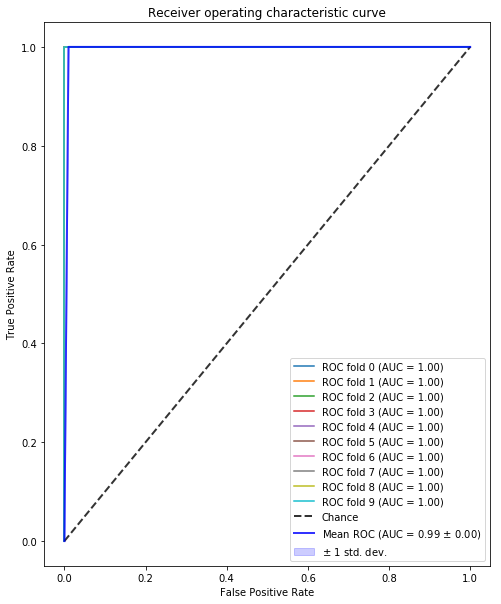

Confusion matrix, without normalization
[[512   0]
 [  0  10]]


<Figure size 432x288 with 0 Axes>

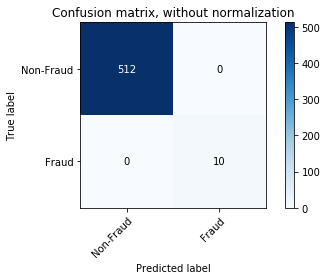

In [37]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
nb_mean_tpr, nb_std_tpr, nb_mean_auc, nb_std_auc, mean_F1, std_F1, cm = roc_analysis(s, labels, clf, cv, True, True, True, False)

[52  0  0  1]
[52  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]
[50  1  0  1]
[51  0  0  1]
[51  0  0  1]
[51  0  0  1]


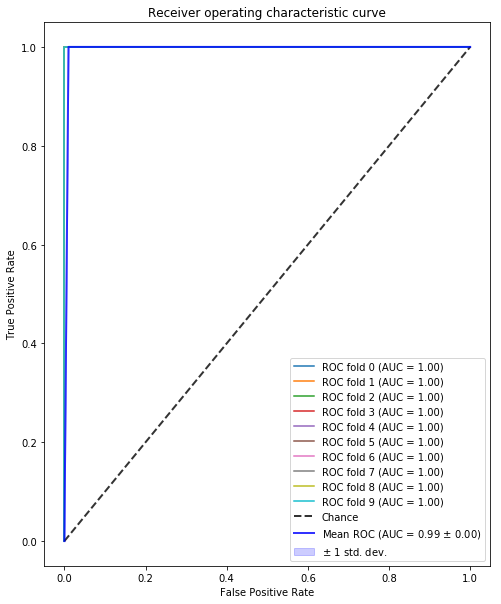

Confusion matrix, without normalization
[[511   1]
 [  0  10]]


<Figure size 432x288 with 0 Axes>

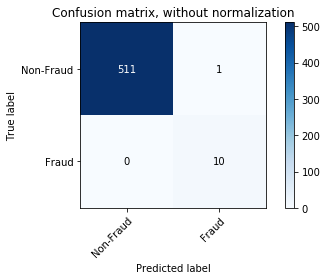

In [36]:
from  sklearn.ensemble import RandomForestClassifier as RF

clf = RF(n_estimators='warn', criterion='gini', min_samples_split=2, min_samples_leaf=1, 
         min_weight_fraction_leaf=0.0, max_features='auto', min_impurity_decrease=0.0, 
         bootstrap=True, n_jobs=-1, verbose=0, warm_start=False)
rf_mean_tpr, rf_std_tpr, rf_mean_auc, rf_std_auc, mean_F1, std_F1, cm = roc_analysis(s, labels, clf, cv, True, True, True, False)

[52  0  1  0]
[41 11  1  0]
[50  1  1  0]
[51  0  1  0]
[51  0  1  0]
[51  0  1  0]
[51  0  1  0]
[48  3  0  1]
[50  1  1  0]
[50  1  1  0]


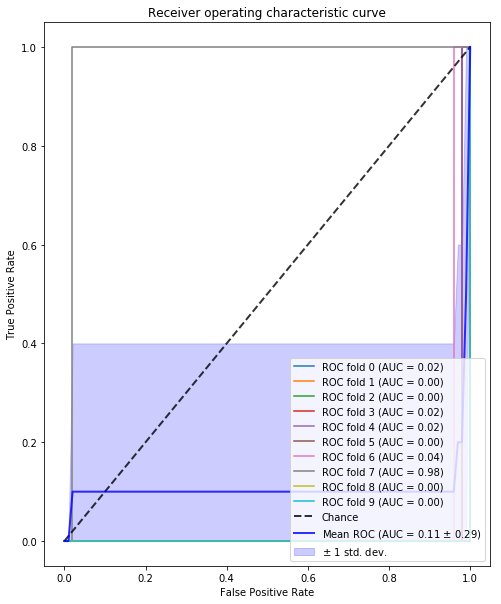

Confusion matrix, without normalization
[[495  17]
 [  9   1]]


<Figure size 432x288 with 0 Axes>

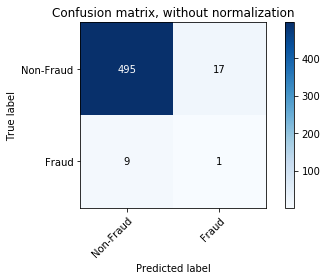

In [38]:
from  sklearn.linear_model import LogisticRegression as LR

clf = LR(C = 1, solver = 'lbfgs', multi_class = 'ovr', n_jobs=-1)
lr_mean_tpr, lr_std_tpr, lr_mean_auc, lr_std_auc, mean_F1, std_F1, cm = roc_analysis(s, labels, clf, cv, True, True, True, False)